# Aufgabe 1

In [62]:
import numpy as np

A = np.array([[1, 2, 4], [2, 3, 8], [-1, -3, -1]])

# QR-Zerlegung
Q, R = np.linalg.qr(A)

# Probe: A = QR
probe = np.matmul(Q, R)

print("Matrix A:")
print(A)
print("\nQR-Zerlegung:")
print("Q:")
print(Q)
print("R:")
print(R)
print("Probe A = QR:")
print(probe)

Matrix A:
[[ 1  2  4]
 [ 2  3  8]
 [-1 -3 -1]]

QR-Zerlegung:
Q:
[[-0.40824829  0.12309149  0.90453403]
 [-0.81649658 -0.49236596 -0.30151134]
 [ 0.40824829 -0.86164044  0.30151134]]
R:
[[-2.44948974 -4.4907312  -8.5732141 ]
 [ 0.          1.3540064  -2.58492131]
 [ 0.          0.          0.90453403]]
Probe A = QR:
[[ 1.  2.  4.]
 [ 2.  3.  8.]
 [-1. -3. -1.]]


In [63]:
import numpy as np

def approximate_diagonal_matrix(A, iterations):
    An = np.copy(A)
    U_matrices = []

    for iteration in range(iterations):
        Q, R = np.linalg.qr(An)
        U_matrices.append(Q)
        An = np.dot(R, Q)
    
    result_U = np.eye(U_matrices[0].shape[0]) # EInheitsmatrix
    for U in U_matrices:
        result_U = np.dot(result_U, U)


    return An, result_U

In [72]:
B = np.array([[2, -1], [-1, 4]])

# Anwenden der Funktion auf Matrix B
B_diagonal, U_B = approximate_diagonal_matrix(B, 10)

# Probe: B = UB'U^T
probe_B = np.matmul(np.matmul(U_B, B_diagonal), U_B.T)

# Vergleich der Approximation mit numpy.linalg.eigvals
eigenvalues_B_approx = np.diagonal(B_diagonal)
eigenvalues_B_exact = np.linalg.eigvals(B)

print("\nMatrix B:")
print(B)
print("\nMatrix B':")
print(B_diagonal)
print("\nProbe B = UB'U^T:")
print(probe_B)
print("\nApproximierte Eigenwerte von B:")
print(eigenvalues_B_approx)
print("\nExakte Eigenwerte von B (numpy.linalg.eigvals):")
print(eigenvalues_B_exact)


Matrix B:
[[ 2 -1]
 [-1  4]]

Matrix B' (approximated):
[[ 4.41421354e+00 -2.44474891e-04]
 [-2.44474891e-04  1.58578646e+00]]

Probe B = UB'U^T:
[[ 2. -1.]
 [-1.  4.]]

Approximierte Eigenwerte von B:
[4.41421354 1.58578646]

Exakte Eigenwerte von B (numpy.linalg.eigvals):
[1.58578644 4.41421356]


# Aufgabe 2

In [65]:
def solveUpper(R, b):
    n = len(b)
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = b[i] / R[i, i]
        for j in range(i-1, -1, -1):
            b[j] -= R[j, i] * x[i]

    return x

R = np.array([[1, 2], [0, 3]])
b = np.array([5, 6])

solution_test = solveUpper(R, b)
print(solution_test)

[1. 2.]


In [66]:
def myQRSolver(A, b):
    Q, R = np.linalg.qr(A)
    Qt_b = np.dot(Q.T, b)
    x = solveUpper(R, Qt_b)
    return x


A_test = np.array([[1, 5], [7, 1]])
b_test = np.array([1, 4])

solution_qr_test = myQRSolver(A_test, b_test)
print(solution_qr_test)

[0.55882353 0.08823529]


In [67]:
A = np.array([[1,2],[3,1]])
b = np.array([1,2])


x = myQRSolver(A,b)
probe = np.matmul(A,x)
print("MyQRSolver results: " , x)
print("probe: ", probe)

#probe
x_numpy = np.linalg.solve(A,b)
numpy_probe = np.matmul(A, x_numpy)
#numpy_probe = np.dot(A,x_numpy)
print("results numpy: ", x_numpy)
print("numpy probe: " ,numpy_probe)

MyQRSolver results:  [0.6 0.2]
probe:  [1. 2.]
results numpy:  [0.6 0.2]
numpy probe:  [1. 2.]


# Aufgabe 3

Matrix A mit dem entsprechenden Vektor b aus dem letzten Übungsblatt:

$ A = \begin{bmatrix}
1 + \lambda & -\lambda & 0 & \cdots & 0 \\
-\lambda & 1 + 2\lambda & -\lambda & \cdots & 0 \\
0 & -\lambda & 1 + 2\lambda & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & -\lambda & 1 + \lambda
\end{bmatrix} $


$b  = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_n
\end{bmatrix} = \begin{bmatrix}
x_1(1+ \lambda) + x_2(-\lambda) -y_1 \\
x_{i-1}(-\lambda) + x_i(1+2\lambda) + x_{i+1}(-\lambda) -y_1 \\
\vdots \\
x_{n-1}(-\lambda) -x_n(1+\lambda) - y_n
\end{bmatrix}$

a) DaS starke Zeilensummenkriterium ist erfüllt, wenn in jeder Zeile die Summer der Beträge der Elemente die nicht auf der Diagonalen leigen kleiner sind als das entsprechende Diagonalelement.

Für die Matrix A muss daher die erste, die i-te sowie die letzte Zeile betrachtet werden:

Für die erste Zeile i=1 heißt das:

$|1 + \lambda| > |-\lambda|$

Da in einer Kostenfunktion davon ausgangen werden kann, dass $\lambda$ immer positiv ist, ist die Bedingung hier erfüllt

Für die letzte Zeile (i=n)

$|1+\lambda| > |-\lambda| $

Auch hier ist die Bedingung für ein positives $\lambda$ erfüllt

Für die inneren Zeilen (2<= i <=n-1)

$|1+2\lambda| > |-\lambda| + |-\lambda|$

Insgesamt ist die Bedingung für jede Zeile erfüllt und die gesamte Matrix A erfüllt das starke Zeilensummenkriterium


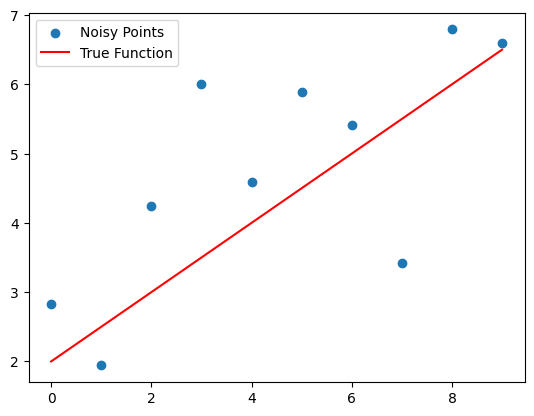

In [68]:
import matplotlib.pyplot as plt

def sampleNoisyPoints(n, m, c):
    t = np.arange(n)
    epsilon = np.random.normal(0, 1, n) 
    y = m * t + c + epsilon 
    return t, y


t, y = sampleNoisyPoints(10, 0.5, 2)

plt.scatter(t, y, label='Noisy Points')
plt.plot(t, 0.5 * t + 2, label='True Function', color='red')
plt.legend()
plt.show()

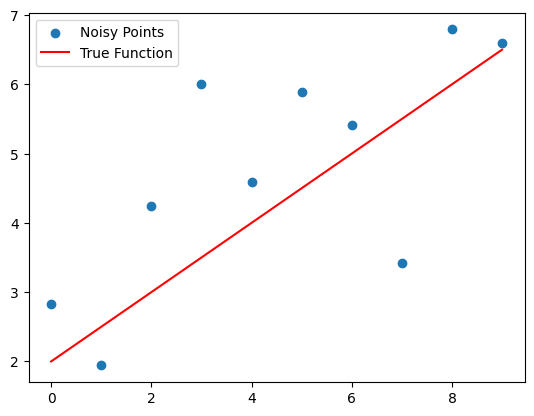

Matrix A:
[[ 1.5 -0.5  0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0. ]
 [ 0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.  -0.5  2.  -0.5]
 [ 0.   0.   0.  -0.5  1.5]]

Vektor b:
[0.  2.  3.  4.  5.5]


In [69]:
def setupLGS(y, lambda_value):
    n = len(y)
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Set up the diagonal elements of A
    for i in range(1, n-1):
        A[i, i-1] = -1 * lambda_value
        A[i, i] = 1 + 2 * lambda_value
        A[i, i+1] = -1 * lambda_value

    A[0, 0] = 1 + lambda_value
    A[0, 1] = -1 * lambda_value
    A[n-1, n-2] = -1 * lambda_value
    A[n-1, n-1] = 1 + lambda_value

    b = np.zeros(n)
    b[0] = y[0] - lambda_value * y[1]
    b[1:n-1] = y[1:n-1] - lambda_value * (y[0:n-2] - 2 * y[1:n-1] + y[2:n])
    b[n-1] = y[n-1] - lambda_value * (y[n-2] - y[n-1])

    return A, b

lambda_value = 0.5
y_values = np.array([1, 2, 3, 4, 5])
A_matrix, b_vector = setupLGS(y_values, lambda_value, )

plt.scatter(t, y, label='Noisy Points')
plt.plot(t, 0.5 * t + 2, label='True Function', color='red')
plt.legend()
plt.show()
print("Matrix A:")
print(A_matrix)
print("\nVektor b:")
print(b_vector)

In [70]:
t, y = sampleNoisyPoints( 10, 0.5, 2) 
lambda_value = 0.1
A, b = setupLGS(y, lambda_value)
x_solution = myQRSolver(A, b)

print("Matrix A:")
print(A_matrix)
print("\nVektor b:")
print(b_vector)
print("\nsolution:")
print(x_solution)

Matrix A:
[[ 1.5 -0.5  0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0. ]
 [ 0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.  -0.5  2.  -0.5]
 [ 0.   0.   0.  -0.5  1.5]]

Vektor b:
[0.  2.  3.  4.  5.5]

solution:
[2.48578329 2.20402167 3.67559108 3.52216358 4.3795332  3.14615573
 5.38613964 5.08840723 5.15612877 5.82475637]


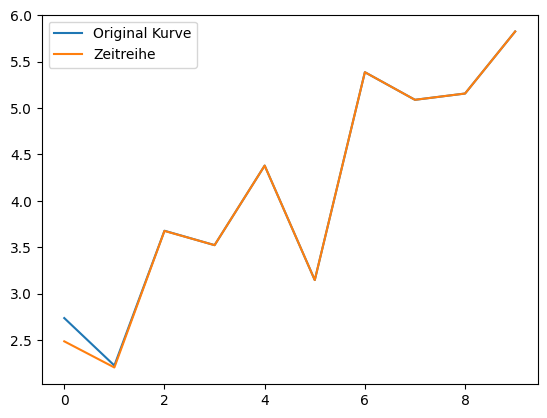

In [71]:
plt.plot(y, label='Original Kurve')
plt.plot(x_solution, label='Zeitreihe')
plt.legend()
plt.show()